**DATASET**-https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

**DATA PREPROCESSING**

In [21]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
print(data.describe())
print(data.info())
print(data.dtypes)
print(data.shape)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age              

In [23]:
X=data.iloc[:,[3,4]]

**EXPLORATORY DATA ANALYSIS**

In [24]:
data.isna().sum().sum()

0

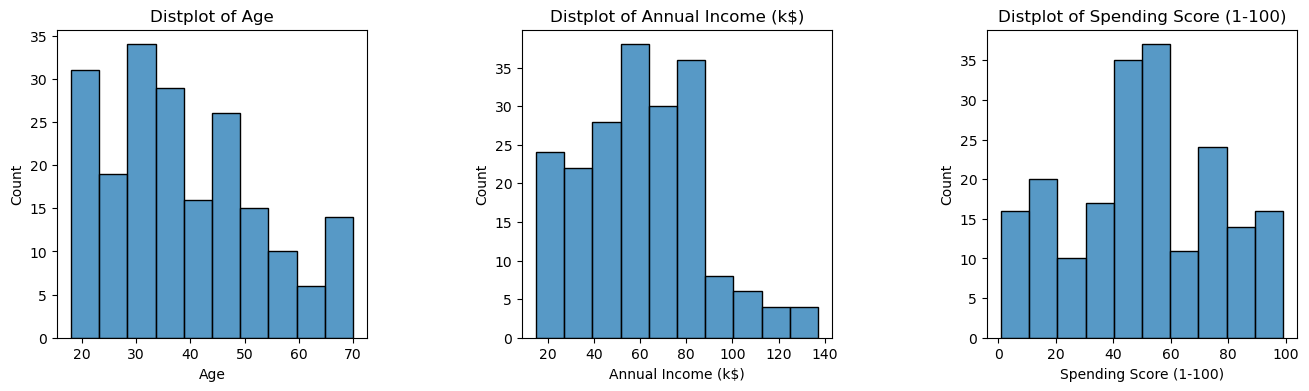

In [25]:

plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.histplot(data[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

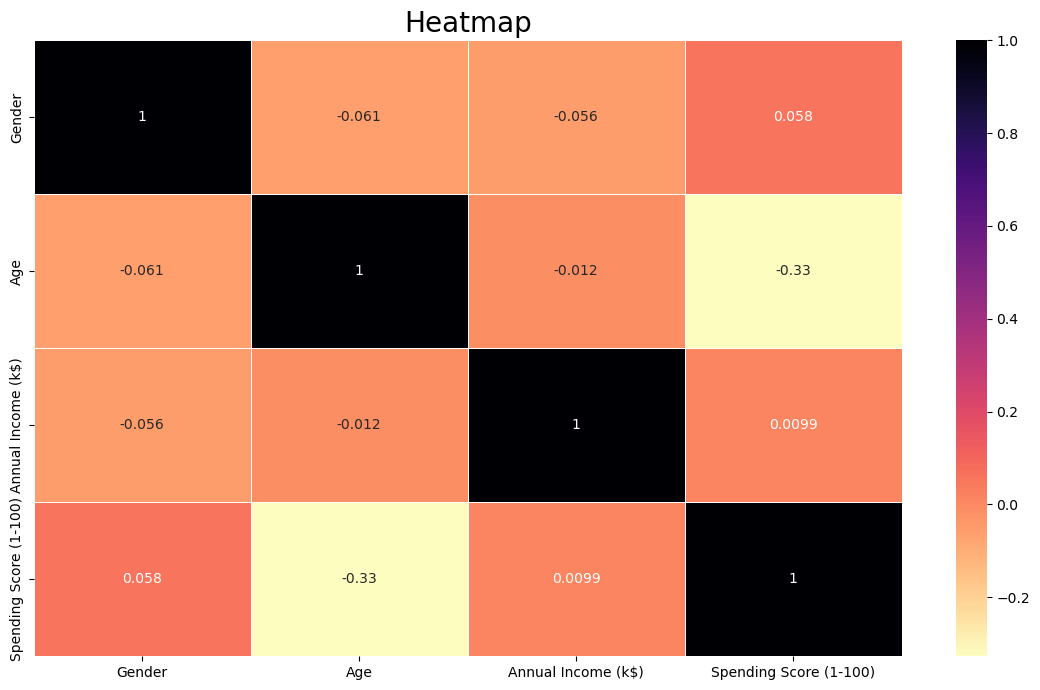

In [26]:
# Convert 'Gender' to numeric values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Generate the heatmap
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(),
            cmap='magma_r', annot=True, linewidths=.5)
plt.title('Heatmap', fontsize=20)
plt.show()


**STANDARIZATION**

In [27]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(X)
scaler.fit(data[['Age','Spending Score (1-100)']])
data[['Age', 'Spending Score (1-100)']] = scaler.transform(data[['Age', 'Spending Score (1-100)']])
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,0.019231,15,0.387755
1,2,0,0.057692,15,0.816327
2,3,1,0.038462,16,0.051020
3,4,1,0.096154,16,0.775510
4,5,1,0.250000,17,0.397959
...,...,...,...,...,...
195,196,1,0.326923,120,0.795918
196,197,1,0.519231,126,0.275510
197,198,0,0.269231,126,0.744898
198,199,0,0.269231,137,0.173469


**SPILT**

In [28]:
sse = []
for k in range(1, 11):
    check_k = KMeans(n_clusters=k, n_init='auto')
    check_k.fit(data[['Age', 'Spending Score (1-100)']])
    # inertia_ is a parameter that gives the value of SSE calculated
    sse.append(check_k.inertia_)


c:\Users\Lenovo\klll\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\klll\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\klll\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\klll\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

In [29]:
sse

[28.17833784431536,
 13.337690580804235,
 8.742236861248738,
 6.369358666824115,
 5.746922418000386,
 4.828237037518597,
 3.2533649209533246,
 2.872321347902348,
 2.5731027281790637,
 2.1630232212729443]

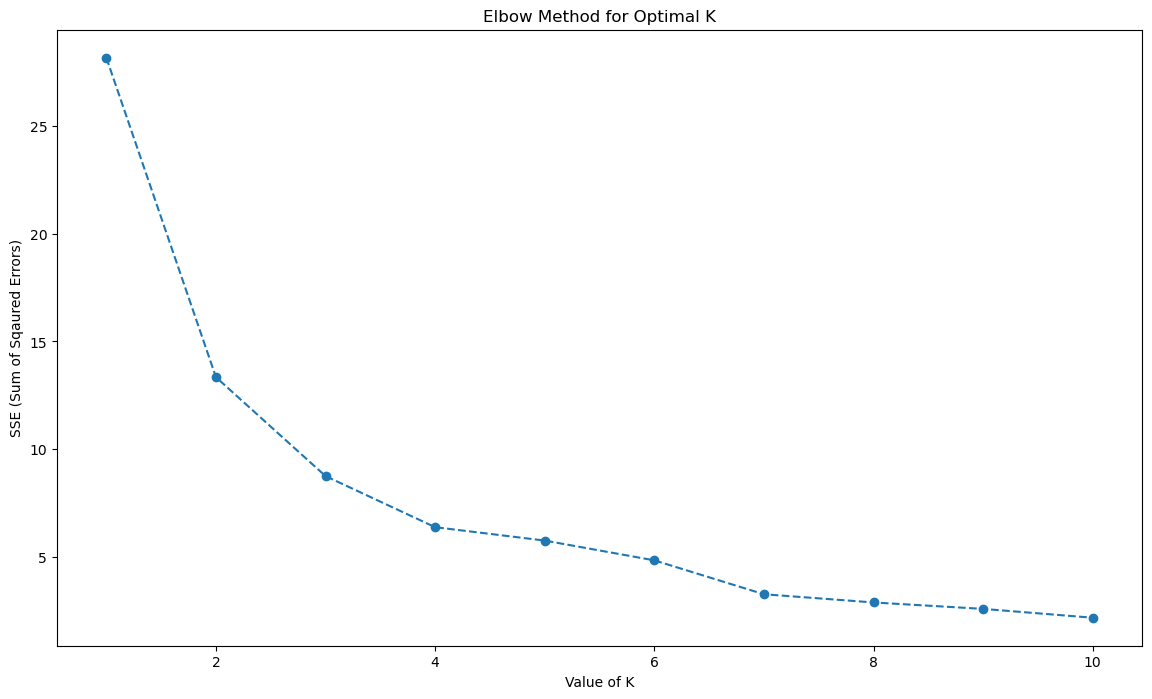

In [30]:
# Now, let's plot SSE values in a chart
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.show()

**PREDICT NUMBER OF CLUSTERING ALGORITHM**

In [33]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
# Adding the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

c:\Users\Lenovo\klll\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


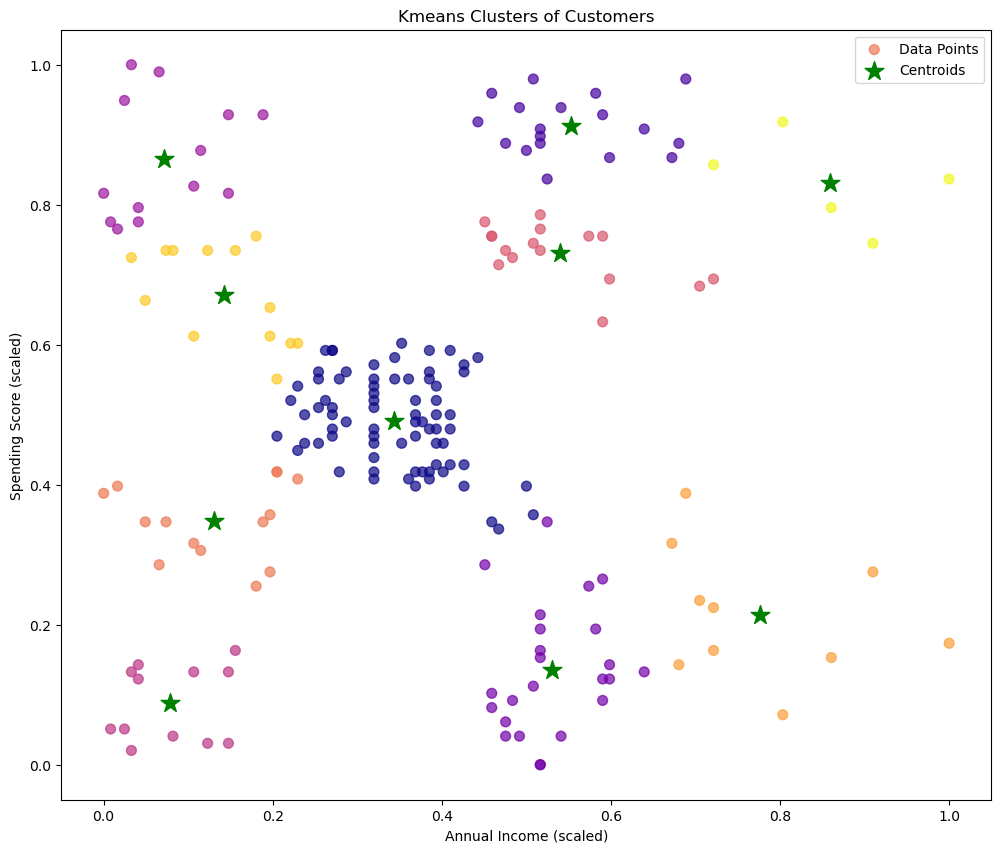

In [41]:
plt.figure(figsize=(12, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='plasma', s=50, alpha=0.7, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='green', marker='*', label='Centroids')
plt.title('Kmeans Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
     

In [42]:
print("Task Completed")

Task Completed


**Task 2 Completed**